In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
hist_coal_gen = pd.read_csv("hist_coal_generation.csv")
hist_coal_gen["Gen_VRE_vPeakCoal"] = hist_coal_gen["Gen_Wind_vPeakCoal"]+hist_coal_gen["Gen_Solar_vPeakCoal"]
all_last_rows_coal = pd.read_csv("hist_coal_generation_lastrows.csv")
all_last_rows_coal["label"] = all_last_rows_coal["label"].fillna("None")
all_last_rows_coal["label"] = all_last_rows_coal["label"].replace("RE","VRE")
all_last_rows_coal["Gen_VRE_vPeakCoal"] = all_last_rows_coal["Gen_Wind_vPeakCoal"]+all_last_rows_coal["Gen_Solar_vPeakCoal"]
hist_coal_gen["Gen_Coal_PhaseOut_Minus"] = 1+hist_coal_gen["Gen_Coal_PhaseOut"]
all_last_rows_coal["Gen_Coal_PhaseOut_Minus"] = 1+all_last_rows_coal["Gen_Coal_PhaseOut"]
hist_coal_gen

,Country Code,Year,Coal_Current_MW,Coal_AnnualMtCO2,Coal_start_year,Coal_Peak_MW,Coal_Ret_MW,Coal_EarlyRet_MW,Coal_Tran_MW,Coal_duration_year,...,Gen_Gas_vPeakCoal,Gen_Growth,Gen_Coal_PhaseOut,RE_vPeakCoal,year_since_peak_gen,year_since_peak_share,rate_decline_gen,rate_decline_share,Gen_VRE_vPeakCoal,Gen_Coal_PhaseOut_Minus
0,DEU,1990,45410.5,250.1,1927.0,45410.5,0.0,0.0,0.0,63.0,...,0.000000,1.000000,0.000000,0.000000,0,-1,NaN,-0.720604,0.000000,1.000000
1,DEU,1991,45832.5,252.5,1927.0,45832.5,0.0,0.0,0.0,64.0,...,-0.014030,0.964553,-0.007644,0.000484,1,0,0.764411,NaN,0.000484,0.992356
2,DEU,1992,46559.5,256.3,1927.0,46559.5,0.0,0.0,0.0,65.0,...,-0.024416,0.957554,-0.046349,0.000710,2,1,2.317443,2.015145,0.000710,0.953651
3,DEU,1993,47339.5,260.4,1927.0,47339.5,0.0,0.0,0.0,66.0,...,-0.018998,0.921526,-0.054154,0.001935,3,2,1.805141,0.646927,0.001935,0.945846
4,DEU,1994,47929.9,263.2,1927.0,47929.9,0.0,0.0,0.0,67.0,...,-0.000677,0.930299,-0.063701,0.004419,4,3,1.592535,0.716035,0.004419,0.936299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,MEX,2018,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,36.0,...,1.612733,2.468012,-0.115839,0.315217,6,15,1.930642,0.323644,0.315217,0.884161
987,MEX,2019,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,37.0,...,1.350621,2.035093,-0.094720,0.621429,7,16,1.353150,0.266568,0.621429,0.905280
988,MEX,2020,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,38.0,...,1.577640,2.266149,-0.426708,0.846894,8,17,5.333851,0.456384,0.846894,0.573292
989,MEX,2021,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,39.0,...,1.704658,2.621118,-0.587267,0.974845,9,18,6.525190,0.526958,0.974845,0.412733


In [4]:
lng_import = pd.read_csv("../_data_process/_temporal_BACI_DGD_LNG_Import.csv")
lng_import

,country,year,HHI_LNG_Import,Value_LNG_Import,contiguity_LNG_Import,agree_LNG_Import,sanction_LNG_Import,common_language_LNG_Import,colony_LNG_Import
0,BEL,1995.0,0.787096,315268.923,0.054071,1.000000,0.000000,0.937416,0.000000
1,BEL,1996.0,0.979444,331257.747,0.009759,1.000000,0.000000,0.999379,0.000000
2,BEL,1997.0,0.999998,461068.874,0.000000,1.000000,0.000000,1.000000,0.000000
3,BEL,1998.0,0.999935,378732.628,0.000033,1.000000,0.000000,1.000000,0.000005
4,BEL,1999.0,0.999007,289145.118,0.000484,0.999988,0.000012,0.999988,0.000000
...,...,...,...,...,...,...,...,...,...
3439,MHL,2020.0,1.000000,0.651,0.000000,0.000000,0.000000,1.000000,0.000000
3440,SXM,2014.0,1.000000,4.536,0.000000,0.000000,0.000000,1.000000,0.000000
3441,ASM,2015.0,1.000000,15.716,0.000000,0.000000,0.000000,1.000000,0.000000
3442,ASM,2016.0,1.000000,108.902,0.000000,1.000000,0.000000,1.000000,0.000000


In [25]:
merged_data_coal = pd.merge(hist_coal_gen,lng_import,left_on=["Country Code","Year"],right_on=["country","year"],how="left")
merged_data_coal["log_LNG_Import"] = np.log(merged_data_coal.Value_LNG_Import)
merged_data_coal

,Country Code,Year,Coal_Current_MW,Coal_AnnualMtCO2,Coal_start_year,Coal_Peak_MW,Coal_Ret_MW,Coal_EarlyRet_MW,Coal_Tran_MW,Coal_duration_year,...,country,year,HHI_LNG_Import,Value_LNG_Import,contiguity_LNG_Import,agree_LNG_Import,sanction_LNG_Import,common_language_LNG_Import,colony_LNG_Import,log_LNG_Import
0,DEU,1990,45410.5,250.1,1927.0,45410.5,0.0,0.0,0.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DEU,1991,45832.5,252.5,1927.0,45832.5,0.0,0.0,0.0,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DEU,1992,46559.5,256.3,1927.0,46559.5,0.0,0.0,0.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DEU,1993,47339.5,260.4,1927.0,47339.5,0.0,0.0,0.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DEU,1994,47929.9,263.2,1927.0,47929.9,0.0,0.0,0.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,MEX,2018,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,36.0,...,MEX,2018.0,0.727696,1168689.315,0.840676,1.000000,0.0,0.845392,0.0,13.971393
987,MEX,2019,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,37.0,...,MEX,2019.0,0.665648,830833.829,0.801327,1.000000,0.0,0.827574,0.0,13.630185
988,MEX,2020,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,38.0,...,MEX,2020.0,0.505228,288488.706,0.659374,1.000000,0.0,0.677181,0.0,12.572411
989,MEX,2021,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,39.0,...,MEX,2021.0,0.463869,476885.086,0.230687,0.999551,0.0,0.261140,0.0,13.075031


In [29]:
hist_gas_gen = pd.read_csv("hist_gas_generation.csv")
merged_data_gas = pd.merge(hist_gas_gen,lng_import,left_on=["Country Code","Year"],right_on=["country","year"],how="left")
merged_data_gas["log_LNG_Import"] = np.log(merged_data_gas.Value_LNG_Import)
merged_data_gas

,Country Code,Year,Coal_Current_MW,Coal_AnnualMtCO2,Coal_start_year,Coal_Peak_MW,Coal_Ret_MW,Coal_EarlyRet_MW,Coal_Tran_MW,Coal_duration_year,...,country,year,HHI_LNG_Import,Value_LNG_Import,contiguity_LNG_Import,agree_LNG_Import,sanction_LNG_Import,common_language_LNG_Import,colony_LNG_Import,log_LNG_Import
0,IND,1985,25411.6,148.5,1939.0,25411.6,0.0,0.0,0.0,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,1986,28831.6,167.9,1939.0,28831.6,0.0,0.0,0.0,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,1987,31841.6,184.6,1939.0,31841.6,0.0,0.0,0.0,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,1988,35289.6,203.4,1939.0,35289.6,0.0,0.0,0.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IND,1989,39605.1,226.8,1939.0,39605.1,0.0,0.0,0.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,SYR,2017,60.0,0.4,2010.0,60.0,0.0,0.0,0.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,SYR,2018,60.0,0.4,2010.0,60.0,0.0,0.0,0.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,SYR,2019,60.0,0.4,2010.0,60.0,0.0,0.0,0.0,9.0,...,SYR,2019.0,1.0,1717.975,1.0,1.0,0.0,1.0,0.0,7.448902
767,SYR,2020,60.0,0.4,2010.0,60.0,0.0,0.0,0.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
merged_data_gas.columns

Index(['Country Code', 'Year', 'Coal_Current_MW', 'Coal_AnnualMtCO2',
       'Coal_start_year', 'Coal_Peak_MW', 'Coal_Ret_MW', 'Coal_EarlyRet_MW',
       'Coal_Tran_MW', 'Coal_duration_year', 'Coal_Share_Ret',
       'Coal_Share_EarlyRet', 'Coal_Share_Tran', 'Coal_Share_PhasedOut',
       'Coal_logCurrent_MW', 'Gas_Current_MW', 'Gas_start_year',
       'Gas_duration_year', 'Gas_Peak_MW', 'Gas_Ret_MW', 'Gas_EarlyRet_MW',
       'Gas_Share_Ret', 'Gas_Share_EarlyRet', 'Gas_Share_PhasedOut',
       'Gas_logCurrent_MW', 'Wind_MW', 'Solar_MW', 'Gas_Growth_MW',
       'Gas_FuelSwitch', 'Gas_Substitution', 'Wind_Growth_MW',
       'Wind_FuelSwitch', 'Wind_Substitution', 'Solar_Growth_MW',
       'Solar_FuelSwitch', 'Solar_Substitution', 'Coal_Phaseout_MW',
       'Electricity from solar (TWh)', 'Electricity from wind (TWh)',
       'Electricity from nuclear (TWh)', 'Electricity from gas (TWh)',
       'Electricity from coal (TWh)', 'Electricity generation (TWh)',
       'AR6_R10', 'ISO', 'Shar

Text(0.5, 0, 'log LNG Import value')

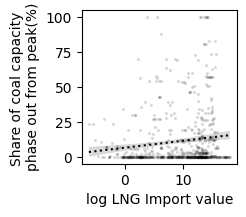

In [40]:
fig, axes = plt.subplots(figsize=(2,2))
#sns.scatterplot(x="log_LNG_Import",y="Coal_Share_PhasedOut",data=merged_data,legend=None,ax=axes)
sns.regplot(x="log_LNG_Import",y="Coal_Share_PhasedOut",data=merged_data_coal,color="black", 
            scatter_kws={'s':2,'alpha':0.1},line_kws={'linewidth':1.5,"linestyle":":"},ax=axes)
axes.set_ylabel("Share of coal capacity \nphase out from peak(%)")
axes.set_xlabel("log LNG Import value")

Text(0.5, 0, 'log LNG Import value')

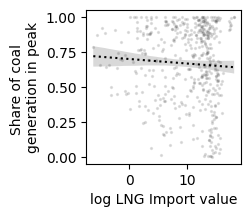

In [39]:
fig, axes = plt.subplots(figsize=(2,2))
#sns.scatterplot(x="log_LNG_Import",y="Coal_Share_PhasedOut",data=merged_data,legend=None,ax=axes)
sns.regplot(x="log_LNG_Import",y="Gen_Coal_vPeak",data=merged_data_coal[merged_data_coal["year_since_peak_gen"]>=0],color="black", 
            scatter_kws={'s':2,'alpha':0.1},line_kws={'linewidth':1.5,"linestyle":":"},ax=axes)
axes.set_ylabel("Share of coal \ngeneration in peak")
axes.set_xlabel("log LNG Import value")

Text(0.5, 0, 'log LNG Import value')

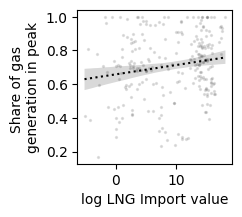

In [38]:
fig, axes = plt.subplots(figsize=(2,2))
#sns.scatterplot(x="log_LNG_Import",y="Coal_Share_PhasedOut",data=merged_data,legend=None,ax=axes)
sns.regplot(x="log_LNG_Import",y="Gen_Gas_vPeak",data=merged_data_gas[merged_data_gas["year_since_peak_gas"]>=0],color="black", 
            scatter_kws={'s':2,'alpha':0.1},line_kws={'linewidth':1.5,"linestyle":":"},ax=axes)
axes.set_ylabel("Share of gas \ngeneration in peak")
axes.set_xlabel("log LNG Import value")